## Text Cleaning and preprocessing

-  Data upload
- words count
- character count
- average word length
- stopword count
- count for mentions ( # and @ )
- digits present in str
- upper case and lower case
- contraction 
- removing email and URL
- remove multiple spaces
- remove html tags
- remove accented characters( tail on some character ) 
- remove stopwords
- lemmatization
- removing most commonally occured words in text
- Textblob tokenization
- spellcheck
- spell correction


In [1]:
import pandas as pd
import numpy as np
import spacy

In [2]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

### data upload

In [3]:
df = pd.read_csv('twitterdata.txt')

In [4]:
df['sentiment'].value_counts()

1    15000
0    15000
Name: sentiment, dtype: int64

### word counts

In [5]:
df['word_counts'] = df['twitts'].apply(lambda x: len(str(x).split()))

In [6]:
df['word_counts'].describe()

count    30000.000000
mean        13.117600
std          6.953986
min          1.000000
25%          7.000000
50%         12.000000
75%         19.000000
max         34.000000
Name: word_counts, dtype: float64

In [7]:
df.head()

,twitts,sentiment,word_counts
0,@robbiebronniman Sounds like a great night.,1,6
1,Damn the person who stolde my wallet !!!!! Ma...,1,18
2,Greetings from the piano bench (photo) http:/...,1,7
3,@drewryanscott i love it!! i love you!! haha f...,1,25
4,"@kissthestars Pretty pretty pretty please, pak...",0,18


### character counts

In [8]:
# not counting the space, so only real character.
def  char_count(x):
    return len(''.join(x.split()))

In [9]:
df['char_count']=df['twitts'].apply(lambda x : char_count(x))

In [10]:
df.head()

,twitts,sentiment,word_counts,char_count
0,@robbiebronniman Sounds like a great night.,1,6,38
1,Damn the person who stolde my wallet !!!!! Ma...,1,18,73
2,Greetings from the piano bench (photo) http:/...,1,7,57
3,@drewryanscott i love it!! i love you!! haha f...,1,25,110
4,"@kissthestars Pretty pretty pretty please, pak...",0,18,113


### average word length

- (total number of character in a string)/(total number of word in a string)


In [11]:
df['avg_word_len'] = df['char_count']/df['word_counts']

In [12]:
df.sample(4)

,twitts,sentiment,word_counts,char_count,avg_word_len
16116,"Did a workout, some housework and now gettin r...",1,17,79,4.647059
15835,Happy birthday Tim!,1,3,17,5.666667
18723,@soledaddl YES! her too! someone just please s...,0,9,46,5.111111
14174,@ChloeFlashDance good luck with that,1,5,32,6.400000


### stop words count

In [13]:
len(stopwords)

305

In [14]:
(stopwords)

{'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'front',
 'full',
 'further',
 'get',
 'give',
 'g

In [15]:
a = ' i am not perfect, but i love to challenge myself'

In [16]:
[w for w in a.split() if w in stopwords]

['i', 'am', 'not', 'but', 'i', 'to', 'myself']

In [17]:
def count_stopwords(x):
    return len([w for w in x.split() if w in stopwords])

In [18]:
df['count_stopwords']= df['twitts'].apply(lambda x : count_stopwords(x))

In [19]:
df.sample(3)

,twitts,sentiment,word_counts,char_count,avg_word_len,count_stopwords
16315,@889grapevine Looking forward to the new website,1,7,42,6.000000,2
27488,Ugh ugh ugh ugh cider mouth!,0,6,23,3.833333,0
2842,"only bad thing is going with my mom, in a car ...",0,16,55,3.437500,9



### count for # and @ 

In [20]:
x = '@sam has written a tweet with #chain'

In [21]:
[w for w in x.split() if w.startswith('#')] 

['#chain']

In [22]:
def count_special_char(x):
    a= [w for w in x.split() if w.startswith('#')]
    b= [w for w in x.split() if w.startswith('@')]
    return f"{len(a) + len(b)}"
    

In [23]:
df['count_hash_mention']=df['twitts'].apply( lambda x : count_special_char(x))

In [24]:
df.head()

,twitts,sentiment,word_counts,char_count,avg_word_len,count_stopwords,count_hash_mention
0,@robbiebronniman Sounds like a great night.,1,6,38,6.333333,1,1
1,Damn the person who stolde my wallet !!!!! Ma...,1,18,73,4.055556,8,0
2,Greetings from the piano bench (photo) http:/...,1,7,57,8.142857,2,0
3,@drewryanscott i love it!! i love you!! haha f...,1,25,110,4.400000,14,1
4,"@kissthestars Pretty pretty pretty please, pak...",0,18,113,6.277778,1,1


### digits presents in text

In [25]:
x = ' this is 100 and 200 $%$'


In [26]:
len([w for w in x.split() if  w.isdigit()])

2

In [27]:
df['count_digits'] = df['twitts'].apply(lambda x :len([w for w in x.split() if  w.isdigit()]) )

In [28]:
df['count_digits'].describe()

count    30000.000000
mean         0.083767
std          0.324274
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: count_digits, dtype: float64

### UPPER case count

In [29]:
df['count_Uppercase']=df['twitts'].apply(lambda x : len([w for w in x.split() if w.isupper()]))

In [30]:
[w for w in df[df['count_Uppercase']>0].iloc[1]['twitts'].split() if w.isupper()]

['I', 'LOL']

In [31]:
df['count_Uppercase'].describe()

count    30000.000000
mean         0.618600
std          1.300868
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         27.000000
Name: count_Uppercase, dtype: float64

### lower case conversion

In [32]:
x = ' i live in India. I study in Germany.'

In [33]:
x.lower()

' i live in india. i study in germany.'

In [34]:
df['twitts']=df['twitts'].apply(lambda x : x.lower())

In [35]:
df['twitts'].head()

0         @robbiebronniman sounds like a great night. 
1    damn the person who stolde my wallet !!!!!  ma...
2    greetings from the piano bench  (photo) http:/...
3    @drewryanscott i love it!! i love you!! haha f...
4    @kissthestars pretty pretty pretty please, pak...
Name: twitts, dtype: object

### contraction to expansion

#### can't  : can not

In [36]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }

In [37]:
len(contraction_mapping)

120

In [38]:
a = "ain't aren't i'd"

In [39]:
a.split()

["ain't", "aren't", "i'd"]

In [40]:
def expand_contraction(x):
    for key,item in contraction_mapping.items():
        x=x.replace(key,item,-1)
    return x

In [41]:
expand_contraction(a)

'is not are not i would'

In [42]:
df['twitts']=df['twitts'].apply(lambda x : expand_contraction(x))

### remove email 

In [43]:
df[df['twitts'].str.contains('@gmail.com')]

,twitts,sentiment,word_counts,char_count,avg_word_len,count_stopwords,count_hash_mention,count_digits,count_Uppercase
19972,@hot2definc phone was stolen bro.... campbell...,0,6,60,10.0,1,1,0,0


In [44]:
import re

In [45]:
a = ' email address is gmsil@hotmail.com hjksdfjk@jskd.com'
b = 'gahsjh shjks'

In [46]:
re.findall('\S+@\S+\.com',a)

['gmsil@hotmail.com', 'hjksdfjk@jskd.com']

In [47]:
# another way to find all email in text
re.findall(r'([a-zA-Z0-9._+-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9._-]+\b)',a)

['gmsil@hotmail.com', 'hjksdfjk@jskd.com']

In [48]:
df['count_email'] = df['twitts'].apply(lambda x : len(re.findall('\S+@\S+\.com',x)))

In [49]:
df[df['count_email']>0]

,twitts,sentiment,word_counts,char_count,avg_word_len,count_stopwords,count_hash_mention,count_digits,count_Uppercase,count_email
11504,@nursehunter you just need to register. then e...,1,17,95,5.588235,7,1,0,0,1
14619,@maritorres cool! just send an email to contac...,1,18,112,6.222222,5,2,0,1,1
19972,@hot2definc phone was stolen bro.... campbell...,0,6,60,10.000000,1,1,0,0,1
24514,@joystiq may i have a code please i'v been wan...,0,20,92,4.600000,9,1,0,2,1
24686,looking to speak to a met life agent. please c...,1,20,102,5.100000,8,0,0,0,1
28377,aw just got the cutest background this little ...,1,18,106,5.888889,6,1,0,3,1


In [50]:
df['twitts']=df['twitts'].apply(lambda x : (re.sub('\S+@\S+\.com','',x)))


### removing URL

In [51]:
s = 'https://www.google.com hjsdksd http://hjd.com'

In [52]:
# \S select all non space character. and \S+ will extract the complete word
re.findall('http\S+\.com',s)

['https://www.google.com', 'http://hjd.com']

In [53]:
re.findall('[a-zA-Z0-9./]+\://[a-zA-Z0-9./]+\.com',s)

['https://www.google.com', 'http://hjd.com']

In [54]:
re.sub('http\S+\.com','',s)

' hjsdksd '

In [55]:
# sometime link do not have .com in end, thats why in regular expression, respective string is removed.
df['count_url'] = df['twitts'].apply(lambda x : len(re.findall('http\S+',x)))

In [56]:
df.head()

,twitts,sentiment,word_counts,char_count,avg_word_len,count_stopwords,count_hash_mention,count_digits,count_Uppercase,count_email,count_url
0,@robbiebronniman sounds like a great night.,1,6,38,6.333333,1,1,0,0,0,0
1,damn the person who stolde my wallet !!!!! ma...,1,18,73,4.055556,8,0,0,0,0,0
2,greetings from the piano bench (photo) http:/...,1,7,57,8.142857,2,0,0,0,0,1
3,@drewryanscott i love it!! i love you!! haha f...,1,25,110,4.400000,14,1,0,0,0,0
4,"@kissthestars pretty pretty pretty please, pak...",0,18,113,6.277778,1,1,0,1,0,0


In [57]:
df['twitts']=df['twitts'].apply(lambda x : re.sub('http\S+','',x))


### Remove special character and puctuation

In [58]:
x = '@drewryanscott@ i love it!! i love you!! haha f..'

In [59]:
# \w means all alphanumeric and with ^ it handles all special characters.
# it has included space also to be excluded. [\w ]
re.sub('[^\w ]+','',x)

'drewryanscott i love it i love you haha f'

In [60]:
df['twitts']=df['twitts'].apply(lambda x : re.sub('[^\w ]+','',x))

### remove multiple spaces

In [61]:
# two and more space in string 

# '\s{2,}'

x = ' i am in India   and  studying NLP      here...'

In [62]:
re.findall('\s{2,}',x)

['   ', '  ', '      ']

In [63]:
re.sub('\s{2,}',' ',x)

' i am in India and studying NLP here...'

In [64]:
x

' i am in India   and  studying NLP      here...'

In [65]:
# another method
' '.join(x.split())

'i am in India and studying NLP here...'

In [66]:
df['twitts']=df['twitts'].apply(lambda x : re.sub('\s{2,}',' ',x))

### Remove HTML tags


In [67]:
!pip install beautifulsoup4


In [68]:
from  bs4 import BeautifulSoup

In [69]:
x = '<html><h1> thanks for watching it </h1></html>'

In [70]:
x

'<html><h1> thanks for watching it </h1></html>'

In [71]:
BeautifulSoup(x,'html').get_text()

' thanks for watching it '

In [72]:
y = 'hsjhj sjhjksdh hjshkds'

In [73]:
BeautifulSoup(y,'html').get_text()

'hsjhj sjhjksdh hjshkds'

In [74]:
df['twitts']=df['twitts'].apply(lambda x : BeautifulSoup(x,'html').get_text().strip())

### remove accented chars


In [75]:
x = 'ème édition Natália sravanth'

In [76]:
import unicodedata

In [77]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii','ignore').decode('utf-8','ignore')
    return x

In [78]:
remove_accented_chars(x)

'eme edition Natalia sravanth'

In [79]:
df['twitts']=df['twitts'].apply(lambda x : remove_accented_chars(x))


### remove stopwords

In [80]:
def remove_stopwords(x):
    return ' '.join([w for w in x.split() if w not in stopwords])

In [81]:
x = ' i am going to join zym soon, let every one enjoy'

In [82]:
remove_stopwords(x)

'going join zym soon, let enjoy'

In [83]:
df['twitts']=df['twitts'].apply(lambda x : remove_stopwords(x))

### lemmatization

In [84]:
nlp = spacy.load('en_core_web_sm')

In [85]:
x = '''men balls chairs feeding trouble
time is best'''

In [86]:
def convert_to_rootword(x):
    doc = nlp(x)
    x_list=[]
    for token in doc:
        lemma = token.lemma_
        x_list.append(lemma)
    return ' '.join(x_list)

In [87]:
convert_to_rootword(x)

'man ball chair feed trouble \n time be good'

In [88]:
df['twitts'] = df['twitts'].apply(lambda x : convert_to_rootword(x))

### removing most commonally occured words in text

In [89]:
text = ' '.join(df['twitts'])

In [90]:
len(text)

1278065

In [91]:
words = text.split()

In [92]:
len(words)

204616

In [93]:
import pandas as pd

In [94]:
frequent_word = pd.Series(words)

In [95]:
f20=frequent_word.value_counts().head(20)


In [96]:
f20_l=f20.tolist()

In [97]:
df['twitts']=df['twitts'].apply(lambda x : ' '.join([w for w in x.split() if w not in f20_l ]))

### Rare words removal

In [98]:
# will use the same list which is generated at last step
tail=frequent_word.value_counts().tail(30)
tail = tail.tolist()

In [99]:
df['twitts']=df['twitts'].apply(lambda x : ' '.join([w for w in x.split() if w not in tail ]))


### word cloud visualization

In [100]:
!pip install wordcloud

In [101]:
from wordcloud import WordCloud

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
text = ' '.join(df['twitts'])

In [104]:
len(text)

1278065

(-0.5, 399.5, 199.5, -0.5)

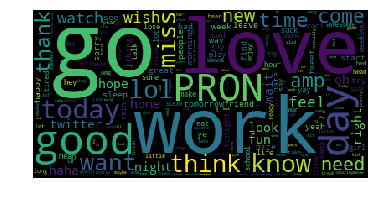

In [105]:
wc = WordCloud(width=400, height=200).generate(text)
plt.imshow(wc)
plt.axis('off')

### spelling correction

In [106]:
!pip install textblob

In [107]:
!python -m textblob.dowload_corpora

C:\Users\Mein Pc\.conda\envs\nlp_course\python.exe: No module named textblob.dowload_corpora


In [108]:
from textblob import TextBlob

In [109]:
x = 'thaanks foor wishhing mee'

In [110]:
x = TextBlob(x).correct()

In [111]:
type(x.raw)

str

In [5]:
import re
from spellchecker import SpellChecker
spell = SpellChecker()

def spell_correct(x):
    for w in spell.unknown(x.split()):
        x=re.sub(w,spell.correction(w),x)
    return x


df['twitts'] = df['twitts'].apply(lambda x :spell_correct(x))

In [ ]:
from textblob import TextBlob
df['twitts'] = df['twitts'].apply(lambda x :TextBlob(x).correct())

In [6]:
spell_correct(' I am gooing to hospitol')

' I am going to hospital'

### Tokenzation using TextBlob

- it is different from the spacy, it specially split and take care of speciall character also

In [ ]:
x = 'speaking&dancing is pretty important'

In [ ]:
TextBlob(x).words

In [ ]:
# with spacy # and & arenot considered

doc=nlp(x)

In [ ]:

for token in doc:
    print(token)


### Language detection and translation

https://www.loc.gov/standards/iso639-2/php/code_list.php

In [ ]:
x = ' I come from India and live in Germany'

In [ ]:
TextBlob(x).detect_language()

In [ ]:
TextBlob(x).translate(to='de')

In [ ]:
TextBlob(x).translate(to='fr')

In [ ]:
TextBlob(x).translate(to='hi')

In [ ]:
TextBlob(x).translate(to='te')

In [ ]:
TextBlob(x).translate(to='ta')

In [ ]:
TextBlob(x).translate(to='ar')


### sentiment classfier( TextBlob)

In [ ]:
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
x = 'People who work hard, luck favours them'

In [ ]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [ ]:
tb.sentiment